In [10]:
from mmdet.apis import init_detector, inference_detector
import mmcv
from utils.myTools import show,rectangle
import cv2
import numpy as np

In [15]:
maskpath='/home/xxy/deep_sort/datasets/chores/mask.jpg'
maskcv=cv2.imread(maskpath, cv2.IMREAD_GRAYSCALE)
maskbool=maskcv.astype(np.bool)

/home/xxy/miniconda3/envs/mmlab/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


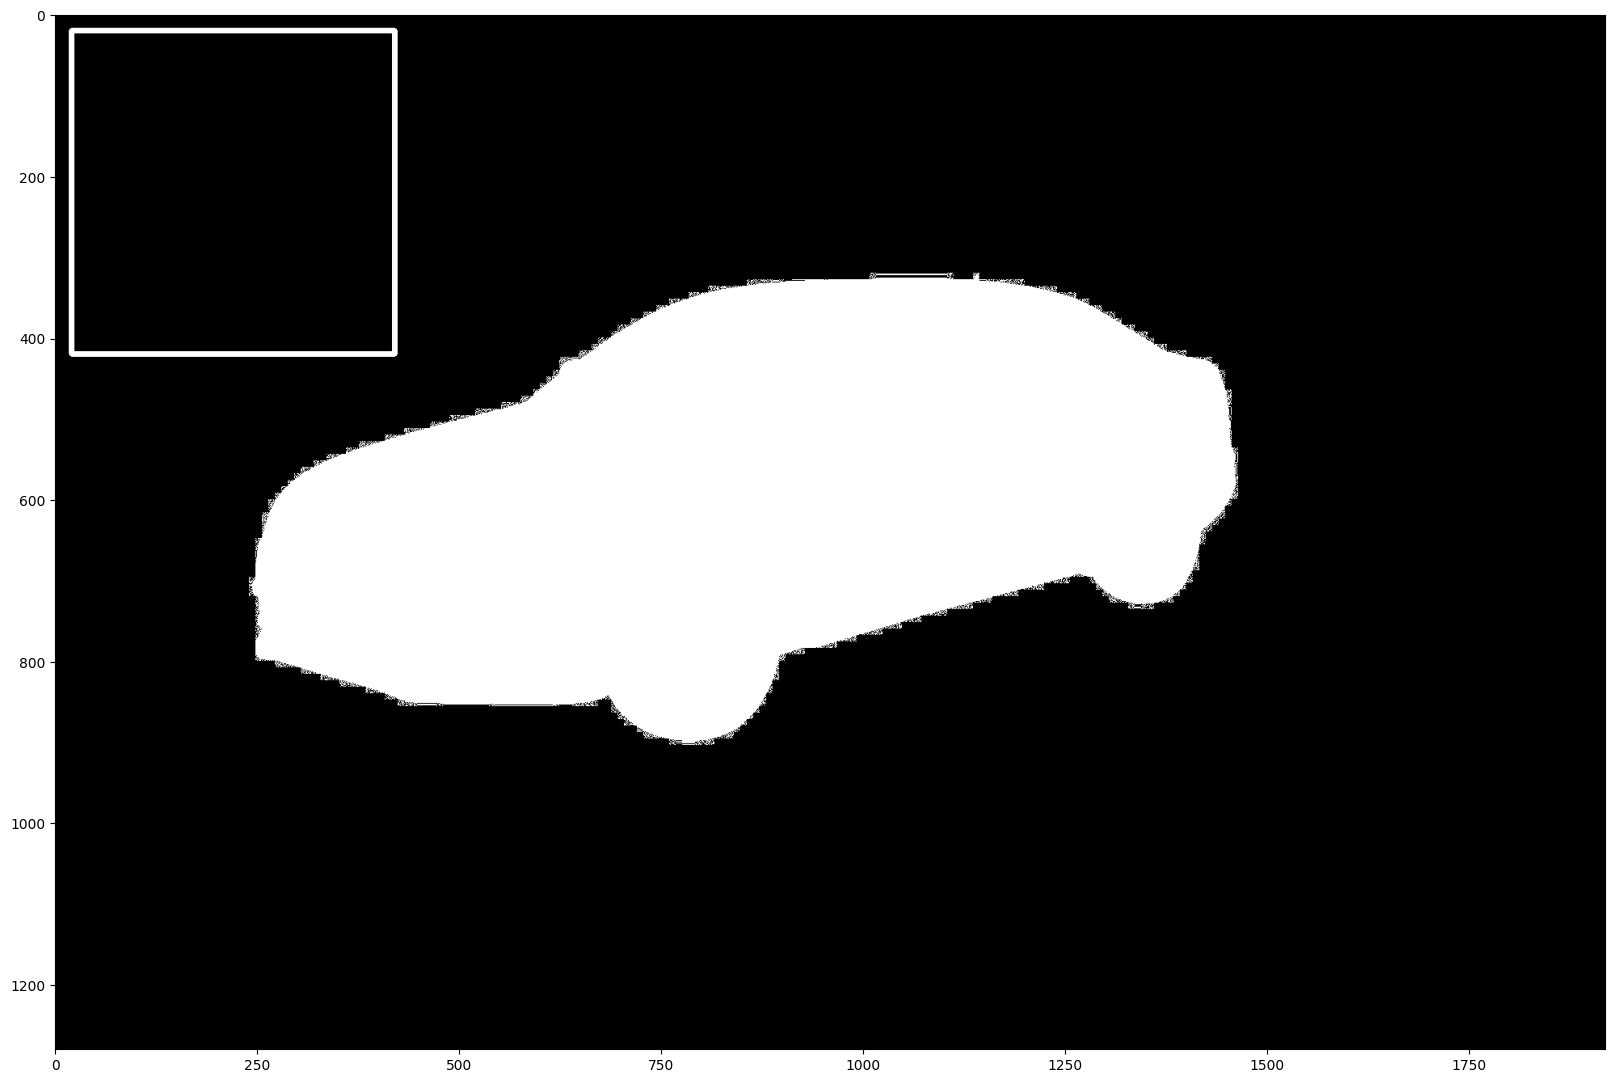

In [21]:
maskbool2=rectangle(maskbool.astype(np.uint8),[20,20,400,400],thickness=5)
show(maskbool2)

In [ ]:
# 指定模型的配置文件和 checkpoint 文件路径
config_file = '/home/xxy/mmdetection/work_dirs/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_FlatCosineAnnealing/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco.py'
checkpoint_file = '/home/xxy/mmdetection/work_dirs/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_FlatCosineAnnealing/epoch_2000.pth'

In [ ]:
# 指定模型的配置文件和 checkpoint 文件路径
config_file = '/home/xxy/mmdetection/configs/my_configs/mask2formerBiggestcontour_swin-s-p4-w7-224_lsj_8x2_50e_coco.py'
checkpoint_file = '/home/xxy/mmdetection/work_dirs/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_FlatCosineAnnealing/epoch_2000.pth'

In [ ]:
# 根据配置文件和 checkpoint 文件构建模型
model = init_detector(config_file, checkpoint_file, device='cuda:1')

In [ ]:
img = '../datasets/lingshui/30fps300s/0001.jpg'  # 或者 img = mmcv.imread(img)，这样图片仅会被读一次
img = mmcv.imread(img)
result = inference_detector(model, img)

In [ ]:
print(type(result),len(result),type(result[0]),type(result[1]))
print(len(result[0]),type(result[0][0]),result[0][0].shape,result[0][0][0])
print(len(result[1]),type(result[1][0]),len(result[1][0]),type(result[1][0][0]),result[1][0][0].shape)
print(result[1][0][0].shape)
# print(result[0][0].tolist())
show(result[1][0][0],figsize=(10,10))
show(result[1][0][1],figsize=(10,10))
# ( [np.array(100个检测框：[x1,y1,w,h,p],[],..)],  [[100个mask：np.array(..),np.array()，..]]  )

In [ ]:
import torchvision.models as models
from torchsummary import summary
from torch import nn
import torch

In [ ]:
res18_128 = models.resnet18()
res18_128.fc.out_features = 128
# print(res18_128)
backbone = res18_128
head = nn.Sequential()
head.add_module('out', nn.Linear(128, 1))
# print(head)
model = nn.Sequential()
model.add_module('backbone_res18-128', backbone)
model.add_module('head_binaray', head)
# print(model)
summary(model,(3,64,64))

In [ ]:
import cv2
from utils.myTools import show

In [ ]:
img=cv2.imread('/home/xxy/deep_sort/output/3fps300s/0001.jpg')
img.shape # (h,w,c)

In [ ]:
show(img,figsize=(10,10))

In [ ]:
tlwh=(600,380,224,224)
x,y,w,h=[int(v) for v in tlwh]
print(x,y,w,h)
patch=img[y:y+h,x:x+w]
show(patch,figsize=(10,10))

In [ ]:
tlwh=(600,380,224,128)
x,y,w,h=[int(v) for v in tlwh]
print(x,y,w,h)
patch=img[y:y+h,x:x+w]
show(patch,figsize=(10,10))
patch2=cv2.resize(patch,(224,224))
show(patch2,figsize=(10,10))

In [ ]:
tlwh=(0,0,644.5,300.2)
tlwh2=(4,3,644.5,300.2)
tlwh_list=[tlwh,tlwh2]
tlwh_list = [[int(v) for v in tlwh] for tlwh in tlwh_list]
tlwh_list

In [ ]:
img.flatten()

In [ ]:
from utils.data import *

In [ ]:
frameFolder = '/home/xxy/deep_sort/datasets/lingshui/30fps300s'
testDataLoader = DataLoader(dataset=LingshuiFrameDataset(frameFolder))

In [ ]:
for img2 in testDataLoader:
    break

In [ ]:
print(img.shape, img2[0].numpy().shape)

In [ ]:
tlwh=(600,380,224,224)
x,y,w,h=[int(v) for v in tlwh]
print(x,y,w,h)
patch=img[y:y+h,x:x+w]
patch2=img2[y:y+h,x:x+w]

In [ ]:
batch.shape